### Prophet exercise

In [17]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [6]:
!pip install prophet

  Using cached prophet-1.1-cp39-cp39-win_amd64.whl (12.1 MB)
  Using cached cmdstanpy-1.0.4-py3-none-any.whl (73 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [9]:
# load data
wmt = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_prophet/master/data/WMT.csv')

* Explore the dataset

In [10]:
wmt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,11815.000000,11815.000000,11815.000000,11815.000000,11815.000000,1.181500e+04
mean,29.942336,30.226543,29.658511,29.948090,24.052813,7.510762e+06
std,29.802418,30.051176,29.566506,29.811830,26.403796,6.327371e+06
min,0.015625,0.015625,0.014404,0.015625,0.005798,0.000000e+00
25%,1.265625,1.281250,1.253906,1.265625,0.513472,3.753600e+06
50%,13.718750,13.843750,13.562500,13.687500,8.964169,6.263200e+06
75%,54.000000,54.570000,53.500000,54.000000,40.389094,9.515000e+06
max,111.489998,112.220001,111.029999,111.599998,111.599998,1.318336e+08


* use only the `Date` and `Adj Close` columns

In [11]:
df = wmt[['Date','Adj Close']]

* rename columns to fit the Prophet naming convention

In [12]:
df = df.rename(columns = {'Date': 'ds',
                         'Adj Close': 'y'})

* convert date to datetime

In [13]:
df['ds'] = pd.to_datetime(df['ds'])

* plot time-series

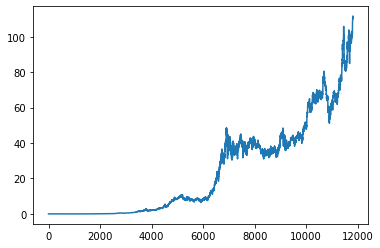

In [14]:
plt.plot(df['y'])

* instantiate Prophet

In [28]:
prophet = Prophet()
df

,ds,y
0,1972-08-25,0.023768
1,1972-08-28,0.023678
2,1972-08-29,0.023408
3,1972-08-30,0.023408
4,1972-08-31,0.023047
...,...,...
11810,2019-06-26,110.160004
11811,2019-06-27,110.099998
11812,2019-06-28,110.489998
11813,2019-07-01,110.620003


* fit model

In [19]:
prophet.fit(df)

15:02:21 - cmdstanpy - INFO - Chain [1] start processing
15:02:35 - cmdstanpy - INFO - Chain [1] done processing


* forecast 365 values into the future 

In [33]:
future = prophet.make_future_dataframe(periods = 365)
forecast = prophet.predict(future)

Exception: Model has not been fit.

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1972-08-25,-0.014389,-5.477152,4.167941,-0.014389,-0.014389,-0.391178,-0.391178,-0.391178,-0.016314,-0.016314,-0.016314,-0.374865,-0.374865,-0.374865,0.0,0.0,0.0,-0.405568
1,1972-08-28,-0.014288,-5.131663,4.148583,-0.014288,-0.014288,-0.391934,-0.391934,-0.391934,-0.008867,-0.008867,-0.008867,-0.383067,-0.383067,-0.383067,0.0,0.0,0.0,-0.406222
2,1972-08-29,-0.014254,-5.199470,4.213310,-0.014254,-0.014254,-0.377400,-0.377400,-0.377400,0.006852,0.006852,0.006852,-0.384252,-0.384252,-0.384252,0.0,0.0,0.0,-0.391654
3,1972-08-30,-0.014220,-4.546276,4.186349,-0.014220,-0.014220,-0.394068,-0.394068,-0.394068,-0.009259,-0.009259,-0.009259,-0.384809,-0.384809,-0.384809,0.0,0.0,0.0,-0.408288
4,1972-08-31,-0.014187,-5.083205,4.533483,-0.014187,-0.014187,-0.395966,-0.395966,-0.395966,-0.011109,-0.011109,-0.011109,-0.384857,-0.384857,-0.384857,0.0,0.0,0.0,-0.410152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,2020-06-27,96.549277,92.033836,101.274016,95.865243,97.181069,-0.002714,-0.002714,-0.002714,0.019348,0.019348,0.019348,-0.022062,-0.022062,-0.022062,0.0,0.0,0.0,96.546564
12176,2020-06-28,96.564130,91.683816,101.158937,95.877942,97.207592,-0.014812,-0.014812,-0.014812,0.019348,0.019348,0.019348,-0.034161,-0.034161,-0.034161,0.0,0.0,0.0,96.549317
12177,2020-06-29,96.578982,91.529368,101.422276,95.890642,97.227759,-0.054143,-0.054143,-0.054143,-0.008867,-0.008867,-0.008867,-0.045276,-0.045276,-0.045276,0.0,0.0,0.0,96.524838
12178,2020-06-30,96.593834,91.870336,101.172181,95.903342,97.245254,-0.048533,-0.048533,-0.048533,0.006852,0.006852,0.006852,-0.055385,-0.055385,-0.055385,0.0,0.0,0.0,96.545301


* plot forecast

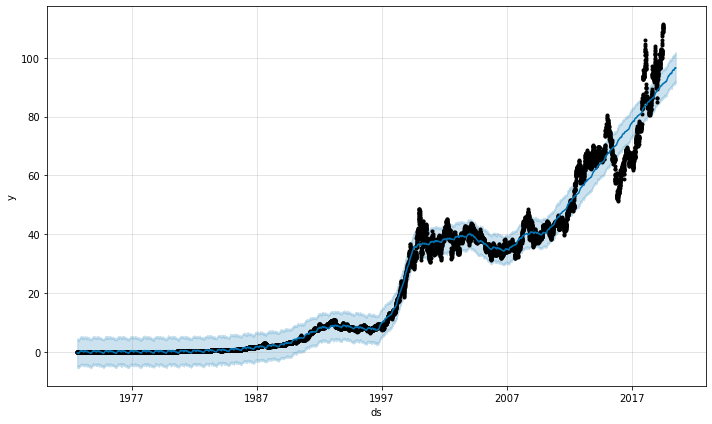

In [25]:
prophet.plot(forecast)
plt.show()

* plot components

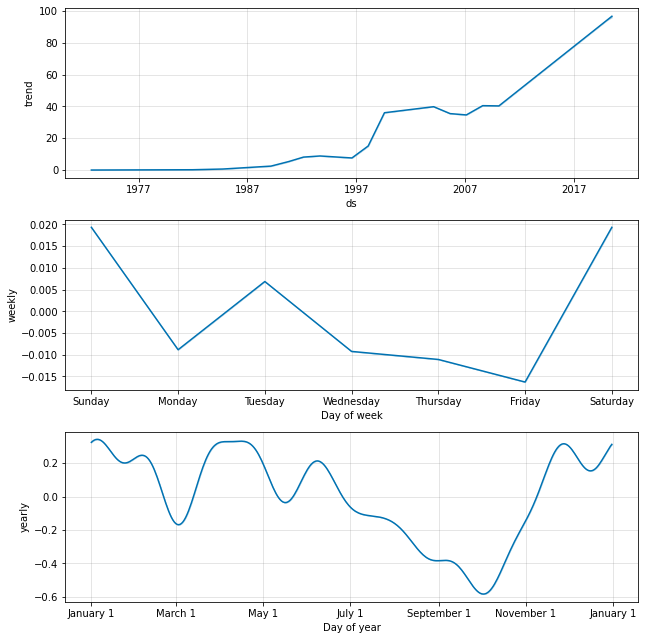

In [27]:
prophet.plot_components(forecast)
plt.show()

## Stretch
### Arima vs. Prophet Modeling

- Build the separate ARIMA model and compare with existing Prophet prediction. Use the last 7 values we have in the timeseries to test which approach has better predictions.